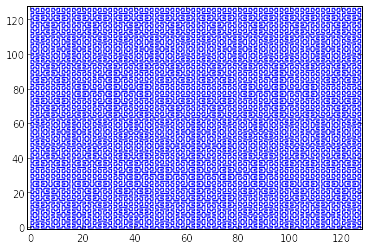

In [12]:
import math

def hilbert_index_to_xy(z, r):    
    if r <= 0 :
        return -1, -1
    
    # positions of resolution r = 1 hilbert curve
    
    positions = (
        [0, 0], # quadrant 0
        [0, 1], # quadrant 1
        [1, 1], # quadrant 2
        [1, 0]  # quadrant 3
    )
    
    # the last two bits of hibert index z represents 
    # the quadrant of the index
    
    quadrant = z & 0x03
    z >>= 2
    rmin = 1
    w = 2
    x, y = positions[quadrant]
    while z > 0:
        quadrant = z & 0x03
        if quadrant == 0 : # left bottom 
                x, y = y, x
        elif quadrant == 1 : # left top
                x, y = x, y + w
        elif quadrant == 2 : # right top
                x, y = x + w, y + w
        elif quadrant == 3 : # right bottom
                x, y = w * 2 - y - 1, w - x - 1
        
        z >>= 2
        rmin += 1
        w <<= 1
        
    if((rmin ^ r) & 0x01) :
        x, y = y, x
    
    return x, y

def xy_to_hilbert_index(x, y, r) :
    # quadrants
    
    quadrants = [
        0, # (0, 0) 
        1, # (0, 1)
        3, # (1, 0)
        2  # (1, 1)
    ]
    
    # determin the minimum resolution rmin, 
    # the index of rmin will be the same with r
    
    rmin = int(math.floor(math.log(max(x, y), 2))) + 1
    if r < rmin :
        return -1
    
    # check the parities of rmin with r, 
    # exchange x, y if they are different
    
    if((rmin ^ r) & 0x01) :
        x, y = y, x
    
    w = 1 << (rmin - 1)
    z = 0
    while rmin > 0 :
        quadrant = quadrants[(int(x / w) << 1) | int(y / w)]
        if quadrant == 0 : # left bottom 
            x, y = y, x
        elif quadrant == 1 : # left top
            x, y = x, y - w
        elif quadrant == 2 : # right top
            x, y = x - w, y - w
        elif quadrant == 3 : # right bottom
            x, y = w - y - 1, w * 2 - x -1
        w >>= 1
        z <<= 2
        z |= quadrant
        rmin -= 1
    
    return z

%matplotlib inline
import matplotlib.pyplot as plt

hilbert_x = []
hilbert_y = []
n = 7
for i in range((2**n)*(2**n)) :
    x, y = hilbert_index_to_xy(i, n)
    hilbert_x += [x]
    hilbert_y += [y]

plt.step(hilbert_x, hilbert_y)
plt.xlim(-1, 2**n)
plt.ylim(-1, 2**n)
plt.show()

In [201]:
2**8

256